In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#Carregando os dados no data frame Os dados usualmente lida com os dados separados por virgula (Arquivos CSV)
titanic = pd.read_csv('https://raw.githubusercontent.com/EdgarNoda/INTI6-2024/main/datasets/Titanic/train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Verificando os tipos de dados
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Verificando os dados nulos
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Eliminando os dados nulos da tabela Embarked, visto que são passageiros que estão ausentes
titanic = titanic.dropna(subset=['Embarked'])

In [ ]:
# Verificando os dados nulos de Embarked
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Eliminando dados menos relevantes
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Visualizando que agora não as tabalas de daddos eliminados anteriormente
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Unindo dois dados (SibSp & Parch) para formar o dados de família
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

In [ ]:
# Visualizando a nova junção de dados feitos anteriormente
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [ ]:
# Atualizando a tabela de visualização para ter somente as tabelas Survived, Pclass, Sex, Age, Fare, Embarked, Family
titanic.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']].head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [ ]:
# Preenche os valores ausentes na coluna 'Age' com a mediana da coluna 'Age'
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

<ipython-input-12-81384cd4306d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


<Axes: >

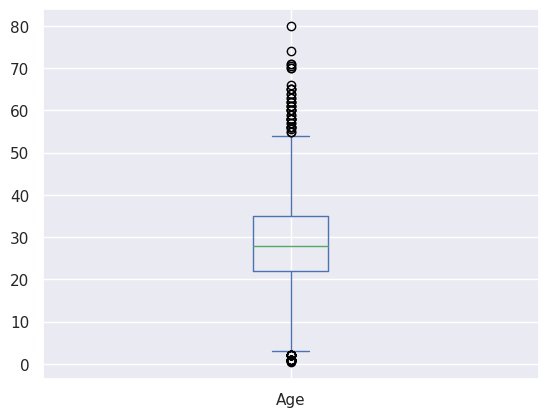

In [ ]:
# Visualização do gráfico boxplot
titanic.Age.plot.box()

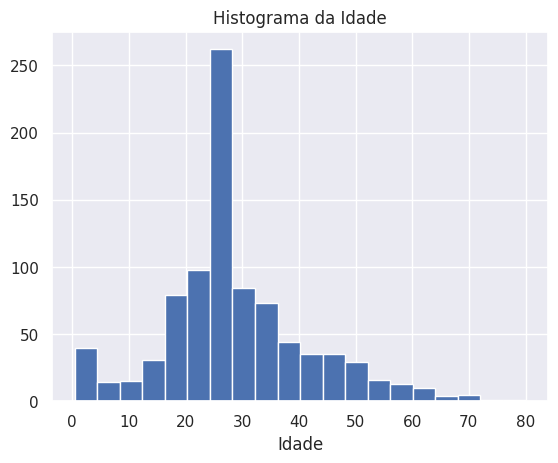

In [ ]:
# Gráfico de Histograma para idade
plt.hist(titanic['Age'], bins=20)
plt.xlabel('Idade')
plt.title('Histograma da Idade')
plt.show()

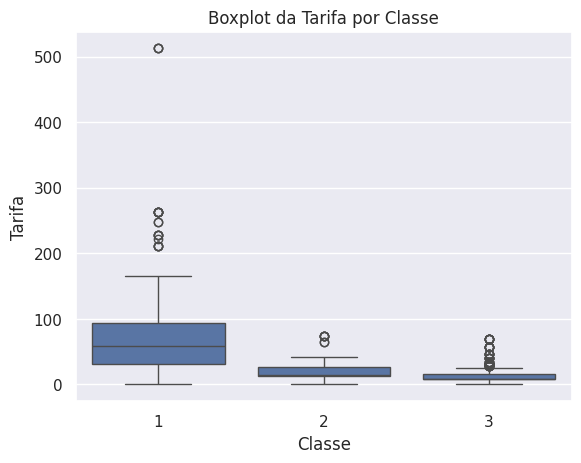

In [ ]:
# Gráfico Boxplot para a tarifa por classe
sns.boxplot(x='Pclass', y='Fare', data = titanic)
plt.xlabel('Classe')
plt.ylabel('Tarifa')
plt.title('Boxplot da Tarifa por Classe')
plt.show()

In [ ]:
# Verificando que não há valores nulos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Family    889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [ ]:
# Calcula a taxa de sobrevivência para passageiros com família
survival_rate_with_family = titanic[titanic['Family'] > 0]['Survived'].mean()

# Calcula a taxa de sobrevivência para passageiros sem família
survival_rate_without_family = titanic[titanic['Family'] == 0]['Survived'].mean()

# Exibe as taxas de sobrevivência
print(f"Taxa de sobrevivência com família: {survival_rate_with_family:.2f}")
print(f"Taxa de sobrevivência sem família: {survival_rate_without_family:.2f}")

Taxa de sobrevivência com família: 0.51
Taxa de sobrevivência sem família: 0.30


In [ ]:
# Cria um dicionário com as taxas de sobrevivência para passageiros com e sem família
survival_rates = {
    'Com Família': survival_rate_with_family,
    'Sem Família': survival_rate_without_family
}

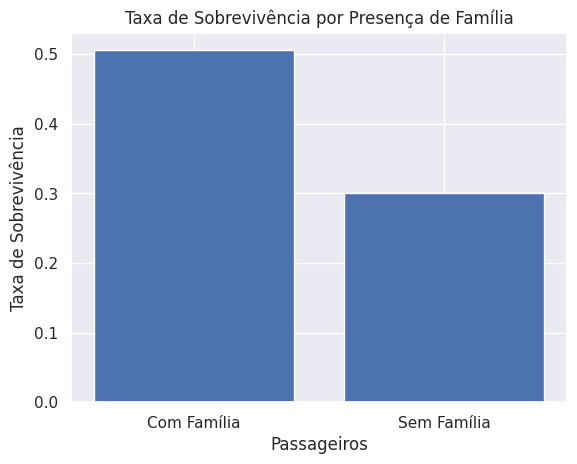

In [ ]:
# Cria um gráfico de barras para comparar as taxas de sobrevivência
plt.bar(survival_rates.keys(), survival_rates.values())
plt.xlabel('Passageiros')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Presença de Família')
plt.show()

In [ ]:
# Agrupa os dados por classe social e calcula a taxa de sobrevivência para cada classe
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean()

# Exibe as taxas de sobrevivência por classe
print(survival_rate_by_class)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


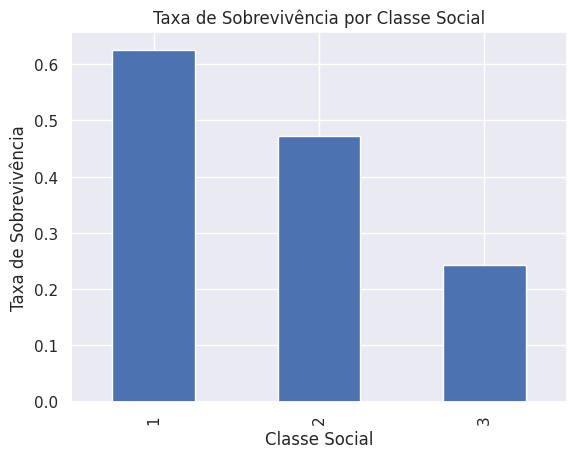

In [ ]:
# Gráfico de barras da taxa de sobrevivência por classe
survival_rate_by_class.plot(kind='bar')
plt.xlabel('Classe Social')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Classe Social')
plt.show()

In [ ]:
# Definindo os valor para as colunas 'X' e 'y'
X = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]  # Features escolhidas
y = titanic['Survived']  # Variável alvo

# Convertendo as variáveis categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)  # Converte 'Sex' para valores numéricos

In [ ]:
# Dividindo os dados em Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treinando o KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Define 5 vizinhos como valor inicial para k
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Fazendo as previsões
y_pred = knn.predict(X_test)

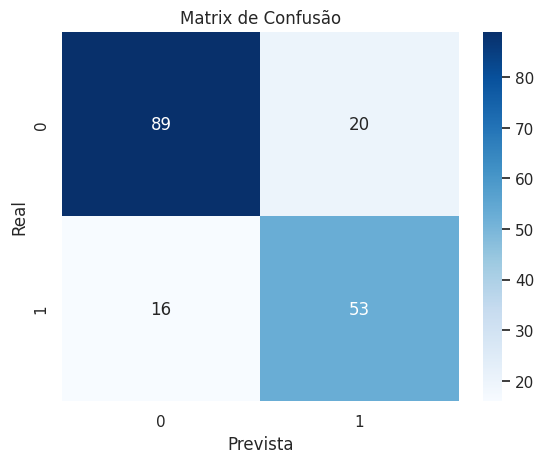

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prevista')
plt.ylabel('Real')
plt.title('Matrix de Confusão')
plt.show()

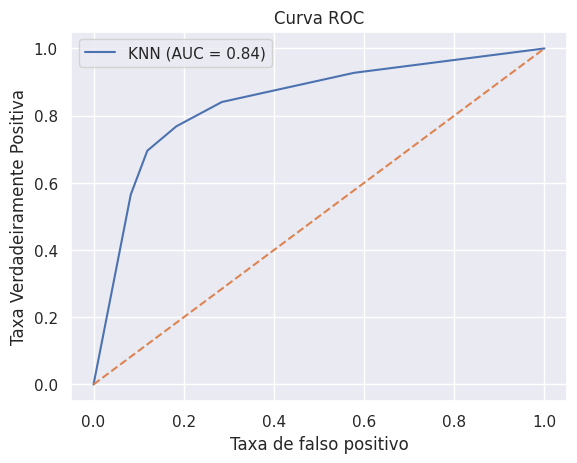

In [ ]:
# Prever as probabilidades
y_prob = knn.predict_proba(X_test)[:, 1]

# Calcula a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plotando a curva ROC e AUC
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Linha diagonal de referência
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa Verdadeiramente Positiva')
plt.title('Curva ROC')
plt.legend()
plt.show()

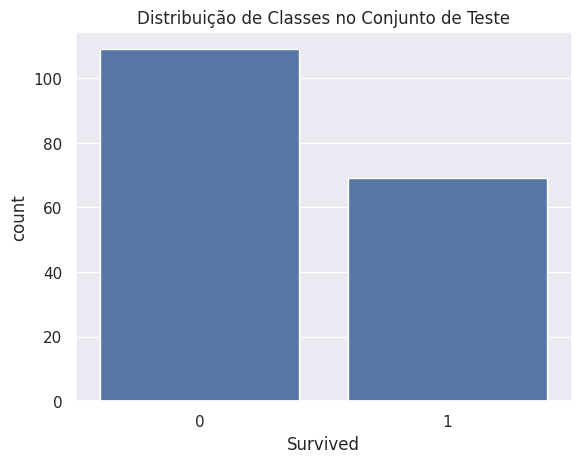

In [ ]:
# Histograma da Distribuição de Classes
sns.countplot(x=y_test)
plt.title('Distribuição de Classes no Conjunto de Teste')
plt.show()

In [ ]:
# Testa diferentes valores de k
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'k={k}, Test Accuracy: {knn.score(X_test, y_test):.2f}')

k=1, Test Accuracy: 0.73
k=2, Test Accuracy: 0.79
k=3, Test Accuracy: 0.78
k=4, Test Accuracy: 0.80
k=5, Test Accuracy: 0.80
k=6, Test Accuracy: 0.80
k=7, Test Accuracy: 0.78
k=8, Test Accuracy: 0.77
k=9, Test Accuracy: 0.78
k=10, Test Accuracy: 0.81


In [ ]:
titanic.to_csv('titanic_adjusted.csv', index=False)